### LangGraph Blog Generation with Sequential Prompt Chaining

In [1]:
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

# Load env vars
load_dotenv()

# Initialize OpenAI model
llm = ChatOpenAI(model="gpt-4o")

In [3]:
from typing_extensions import TypedDict

# Graph state
class State(TypedDict):
    topic: str
    title: str
    content: str

In [9]:
# Define nodes
def generate_title(state: State):
    """Generates a blog title based on the topic in the state. Just one single title best suitable for the topic."""
    result = llm.invoke(f"Write a title for a blog about {state['topic']}")
    return {"title": result.content}


def generate_content(state: State):
    """Generates blog content based on the title in the state."""
    result = llm.invoke(f"Write blog content for the title {state['title']}")
    return {"content": result.content}

In [10]:
from langgraph.graph import StateGraph, START, END

# Build the workflow
workflow = StateGraph(State)

# Add nodes to workflow
workflow.add_node("generate_blog_title", generate_title)
workflow.add_node("generate_blog_content", generate_content)

# Add edges to connect nodes
workflow.add_edge(START, "generate_blog_title")
workflow.add_edge("generate_blog_title", "generate_blog_content")
workflow.add_edge("generate_blog_content", END)

# Compile workflow
graph = workflow.compile()

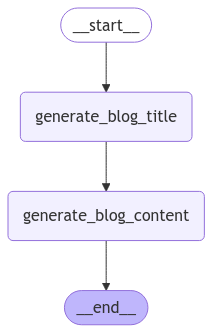

In [11]:
# Show graph workflow
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
# Invoke
result = graph.invoke({"topic": "Agentic AI"})
print(result['title'])
print(result['content'])

"Exploring Agentic AI: The Future of Autonomous Decision-Making"
Title: Exploring Agentic AI: The Future of Autonomous Decision-Making

---

**Introduction: The Rise of Agentic AI**

In a world teetering on the brink of the digital and physical realms, the concept of agency in artificial intelligence is more prescient than ever. As we delve into the era of advanced technology, understanding agentic AI—AI systems that can make autonomous decisions—becomes crucial. Agentic AI systems are sophisticated machines capable of perceiving their environment, processing inputs, making informed decisions, and carrying out actions to achieve specific goals without human intervention. As we explore the future of autonomous decision-making, it's essential to grasp how agentic AI is reshaping industries, ethics, and society at large.

**Understanding Agentic AI: Defining Autonomy**

Agentic AI is not merely about pre-programmed responses or simple algorithms; it's about creating systems that can adapt